Importing libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import uniform

define paremetrs for lamdba

In [2]:
num_samples = 10000
a_values = [0, 2, 4] 
omega_values = [1, 2, 3] 
num_bins = 20  # Кількість підінтервалів для тесту Chi-squared
alpha = 0.05  # Рівень значущості для тесту Chi-squared


In [3]:

def generate_random_numbers(a, c, num_samples):
    z = np.zeros(num_samples)
    x = np.zeros(num_samples)
    z[0] = 42  # Початкове значення z₀ (можна вибрати інше)
    
    for i in range(1, num_samples):
        z[i] = (a * z[i-1]) % c
        x[i] = (z[i] + c) / c
        
    return x


In [4]:
def chi_squared_test(random_numbers, num_bins, alpha):
    observed_frequencies = np.histogram(random_numbers, bins=num_bins, density=True)[0]
    expected_frequency = uniform.pdf(np.linspace(0, 1, num_bins))
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)
    
    degrees_of_freedom = num_bins - 1
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical

In [5]:

# Задаємо параметри a і c
a_values = [5**13, 2**31]
c_values = [2**31, 5**13]

# Кількість випадкових чисел, яку ми генеруємо
num_samples = 10000

define function for building plot

Параметри a=1220703125, c=2147483648
Середнє: 1.498591324453894
Дисперсія: 0.08325731073410489
Статистика Chi-squared: 10.001070140151768
Критичне значення Chi-squared: 30.14352720564616
Нульову гіпотезу не відхиляємо (розподіл відповідає)


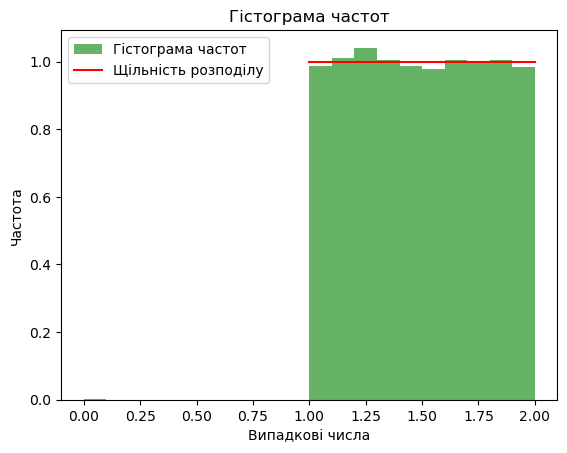

Параметри a=1220703125, c=1220703125
Середнє: 0.9999
Дисперсія: 9.999000000000009e-05
Статистика Chi-squared: 379.92000800000096
Критичне значення Chi-squared: 30.14352720564616
Нульову гіпотезу відхиляємо (розподіл не відповідає)


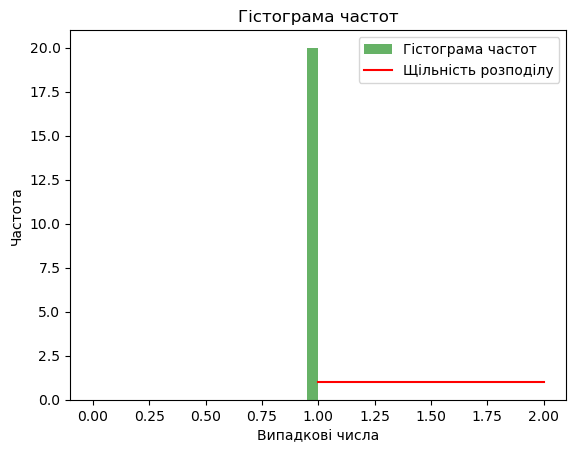

Параметри a=2147483648, c=2147483648
Середнє: 0.9999
Дисперсія: 9.999000000000009e-05
Статистика Chi-squared: 379.92000800000096
Критичне значення Chi-squared: 30.14352720564616
Нульову гіпотезу відхиляємо (розподіл не відповідає)


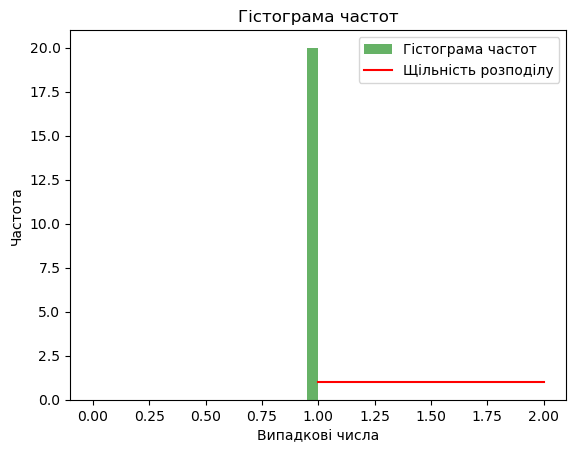

Параметри a=2147483648, c=1220703125
Середнє: 1.5027553541085594
Дисперсія: 0.08409646973662441
Статистика Chi-squared: 10.005260930852534
Критичне значення Chi-squared: 30.14352720564616
Нульову гіпотезу не відхиляємо (розподіл відповідає)


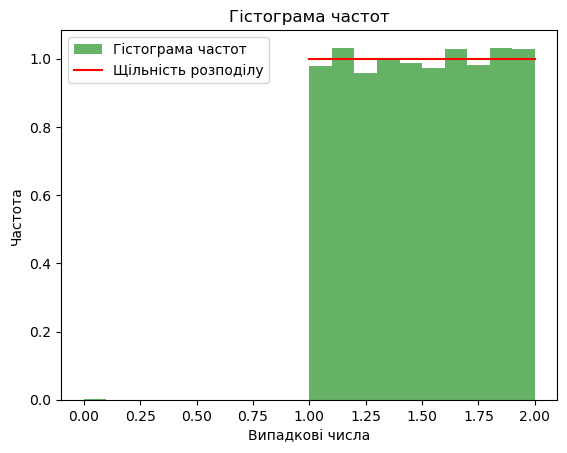

In [6]:
for a in a_values:
    for c in c_values:
        random_numbers = generate_random_numbers(a, c, num_samples)
        
        # Побудова гістограми частот
        plt.hist(random_numbers, bins=num_bins, density=True, alpha=0.6, color='g', label='Гістограма частот')
        
        # Визначення середнього і дисперсії
        mean = np.mean(random_numbers)
        variance = np.var(random_numbers)
        
        chi_squared_statistic, chi_squared_critical = chi_squared_test(random_numbers, num_bins, alpha)
        uniform_pdf = uniform.pdf(np.linspace(0, 1, num_bins))

        # Побудова графіку щільності розподілу
        plt.plot(np.linspace(1, 2, num_bins), uniform_pdf, 'r-', label='Щільність розподілу')

        # Виведення результатів
        print(f'Параметри a={a}, c={c}')
        print(f'Середнє: {mean}')
        print(f'Дисперсія: {variance}')
        print(f'Статистика Chi-squared: {chi_squared_statistic}')
        print(f'Критичне значення Chi-squared: {chi_squared_critical}')
        
        # Порівняння результатів тесту з критичним значенням
        if chi_squared_statistic <= chi_squared_critical:
            print('Нульову гіпотезу не відхиляємо (розподіл відповідає)')
        else:
            print('Нульову гіпотезу відхиляємо (розподіл не відповідає)')
        
        # Показ графіку
        plt.legend()
        plt.xlabel('Випадкові числа')
        plt.ylabel('Частота')
        plt.title('Гістограма частот')
        plt.show()
